In [1]:
!pip install nibabel

Defaulting to user installation because normal site-packages is not writeable


In [21]:
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
from scipy.ndimage import gaussian_filter
import numpy as np
from skimage.transform import resize, rotate
from PIL import Image
import nibabel as nib
import os

In [2]:
%matplotlib inline

In [3]:
# test_img_path = "image_files/test_image/presentation_mri.jpg"

In [4]:
# from PIL import Image
# test_img = Image.open(test_img_path)
# test_img.show()

# Rotation & blur

In [5]:
# import skimage
# import numpy as np

# rotated_array = skimage.transform.rotate(np.array(test_img),5, preserve_range=True)
# rotated_img = Image.fromarray(np.uint8(rotated_array))
# rotated_img.show()

In [7]:
# blurred_array = skimage.filters.gaussian(np.array(test_img),sigma=2,preserve_range=True)
# blurred_img = Image.fromarray(np.uint8(blurred_array))
# blurred_img.show()

# Generating augmented frames for 2D image

In [6]:
def imgage_path_to_array(image_path):
    if '.dcm' in image_path:
        dicom_data = pydicom.dcmread(image_path)
        return dicom_data.pixel_array
    elif '.nii.gz' in image_path:
        nifti_data = nib.load(image_path)
        return nifti_data.get_fdata()
    else:
        return np.array(Image.open(image_path))

In [9]:
# def save_frame(frame, frame_number, save_frame_path, frame_name):
#     frame_path = save_frame_path + f"{frame_name}_{frame_number:02d}.png"
#     Image.fromarray((frame * 255).astype(np.uint8)).save(frame_path)
#     img = plt.imread(frame_path)
#     return img

In [10]:
# def calculate_max_size(image_array, max_elongation):
#     max_height = int(image_array.shape[0] * (1 + max_elongation))
#     max_width = int(image_array.shape[1] * (1 + 0.25 * max_elongation))
#     return max_height, max_width

In [11]:
# def generate_random_factors(num_frames, random=True):
#     if random:
#         rnd_factors = {
#             "rnd_me": np.random.rand() - 0.5,
#             "rnd_ts": np.random.randint(0, int(num_frames * 0.15)) - int(num_frames * 0.15 * 0.5),
#             "rnd_blur_size": (np.random.rand() - 0.5) * 2,
#             "rnd_blur_shift": (np.random.rand() - 0.5) * np.pi
#         }
#     else:
#         rnd_factors = {"rnd_me": 0, "rnd_ts": 0, "rnd_blur_size": 0, "rnd_blur_shift": 0}
#     return rnd_factors

# def apply_random_factors(max_elongation, blur_size, rnd_factors):
#     max_elongation += rnd_factors["rnd_me"] * 0.015
#     blur_size += rnd_factors["rnd_blur_size"]
#     blur_shift = rnd_factors["rnd_blur_shift"]
#     return max_elongation, blur_size, blur_shift

In [12]:
# def generate_frame(image_array, frame_number, num_frames, max_elongation, blur_size, blur_shift, max_size):
#     t = np.linspace(0, 2 * np.pi, num_frames)[frame_number]
#     elongation_factor_height = 1.0 + max_elongation * np.sin(t)
#     elongation_factor_width = 1.0 + max_elongation * np.sin(t) * 0.25
#     output_image = resize(image_array, (int(image_array.shape[0] * elongation_factor_height),
#                                         int(image_array.shape[1] * elongation_factor_width)),
#                           anti_aliasing=True, mode='reflect')
    
#     sigma = 0 + (blur_size * np.abs(np.sin(t + blur_shift)))
#     output_image = gaussian_filter(output_image, sigma=(sigma, 0, 0))

#     background = np.zeros((max_size[0], max_size[1], 3))
#     top_offset = max_size[0] - output_image.shape[0]
#     left_offset = int((max_size[1] - output_image.shape[1]) / 2)
#     background[top_offset:top_offset + output_image.shape[0], left_offset:left_offset + output_image.shape[1]] = output_image[..., :3]
#     return background

In [13]:
# def generate_effect_frames_for_animation(image_path, save_frame_path,frame_name = "frame", num_frames=10, max_elongation=0.025, blur=True, random=False):
    
#     # get array from img path
#     image_array = imgage_path_to_array(image_path)

#     blur_size = 3
#     blur_shift = 0

    
#     #generate random factor for amplitude, time scale, blur 
#     rnd_factors = generate_random_factors(num_frames, random)
#     max_elongation, blur_size, blur_shift = apply_random_factors(max_elongation, blur_size, rnd_factors)
    
    
#     # Calculate the maximum elongation size of the output image (biggest elongations)
#     max_height, max_width = calculate_max_size(image_array, max_elongation)
#     max_size = (max_height, max_width)

#     frames = []
#     for frame_number in range(num_frames):
#         background = generate_frame(image_array, frame_number, num_frames, max_elongation, blur_size, blur_shift, max_size)
#         img = save_frame(background, frame_number, save_frame_path, frame_name)
#         frames.append([img])

#     return frames


# Save frames, and display as animation

In [14]:
# def frames_to_animation():
#     pass

In [15]:
# num_frames = 10
# test_img_path = "image_files/test_image/presentation_mri.jpg"
# save_frame_path = "image_files/test_image/frames/" #needs '/' at the end; TODO: add fix in function
# # test_img_path = "image_files/test_patient/p_001.nii.gz" #TODO: add .nii.gz compatibility
# # save_frame_path = "image_files/test_patient/frames/" #needs '/' at the end TODO: add fix in function

# frame_name = "frame"

# # Generate frames with effects for animation
# generate_effect_frames_for_animation(test_img_path,save_frame_path,frame_name,num_frames=num_frames, random=True)


# # Set up the figure
# fig = plt.figure()
# ax = fig.add_subplot(111)
# ax.axis('off')  # Turn off axes

# # Load all the saved frames
# frames = []  # To hold the images for animation
# for i in range(0, num_frames):
#     frame_path = save_frame_path+f"{frame_name}_{i:02d}.png"
#     frame = Image.open(frame_path)
#     frames.append([plt.imshow(frame, animated=True)])

# # Create the animation
# ani = animation.ArtistAnimation(fig, frames, interval=(2000/num_frames), blit=True, repeat_delay=1000)
# ani.save('animation.gif', writer='pillow')
# # Show the animation
# plt.close()  # Close the static figure to prevent it from displaying
# # ani  # This will show the animation in the output cell
# %matplotlib inline
# HTML(ani.to_jshtml())

In [16]:
# import skimage
# import numpy as np

# def rotate_image(img, angle):
#     #assumes `img` is loaded with PIL's `Image` function 
#     rotated_array = skimage.transform.rotate(np.array(img),angle, preserve_range=True)
#     return Image.fromarray(np.uint8(rotated_array))

# def flip_image_lr(img):
#     #assumes `img` is loaded with PIL's `Image` function 
#     rotated_array = skimage.transform.rotate(np.array(img),0, preserve_range=True)
#     return Image.fromarray(np.fliplr(np.uint8(rotated_array)))

# rotated_image = rotate_image(test_img, 5)
# rotated_image.show()
# flipped_image = flip_image_lr(test_img)
# flipped_image.show()
# print(type(flipped_image))
# print(type(test_img))


<class 'numpy.ndarray'> (495, 507)


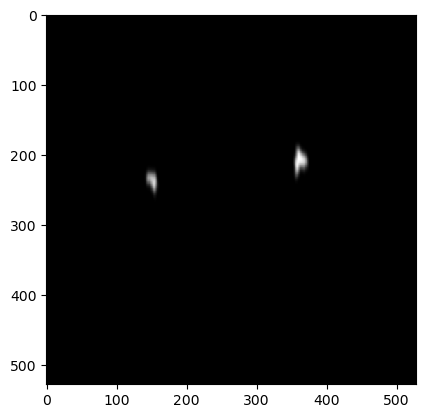

<class 'numpy.ndarray'> (497, 508)


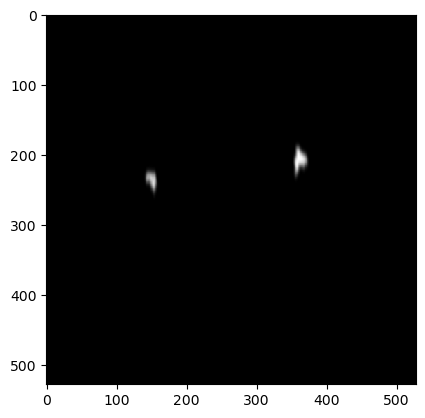

<class 'numpy.ndarray'> (503, 509)


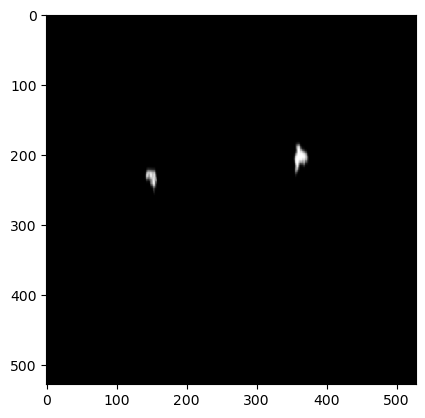

<class 'numpy.ndarray'> (510, 511)


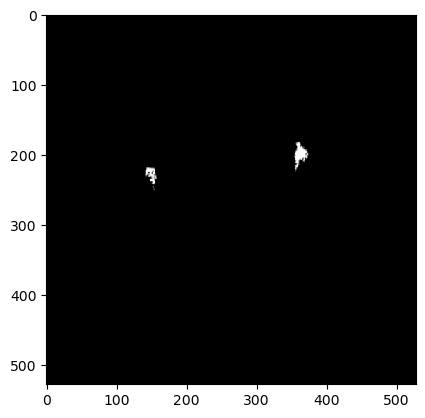

<class 'numpy.ndarray'> (518, 513)


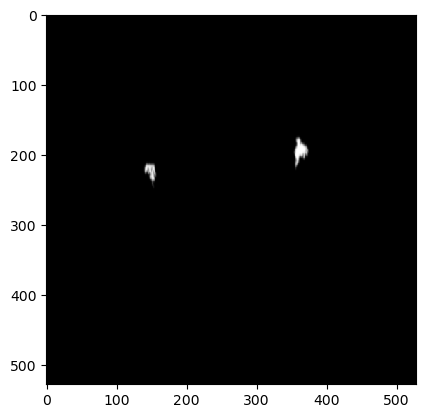

<class 'numpy.ndarray'> (524, 515)


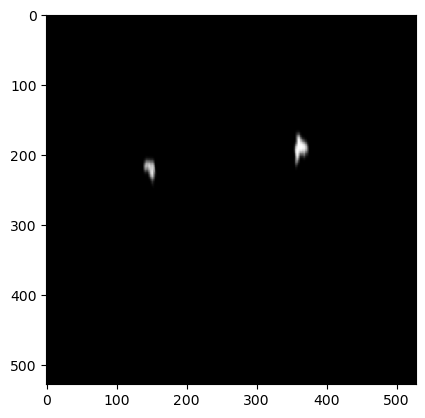

<class 'numpy.ndarray'> (528, 516)


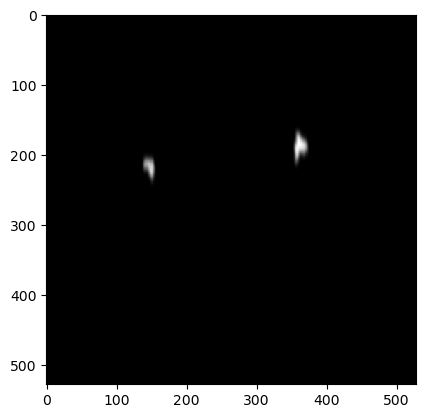

<class 'numpy.ndarray'> (528, 516)


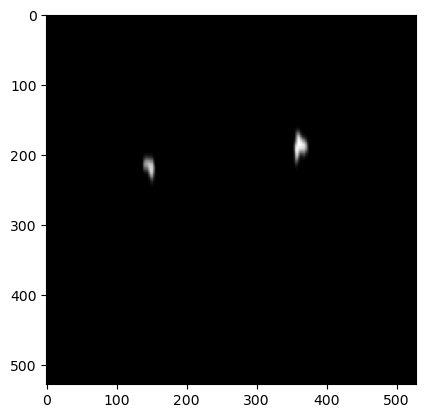

<class 'numpy.ndarray'> (525, 515)


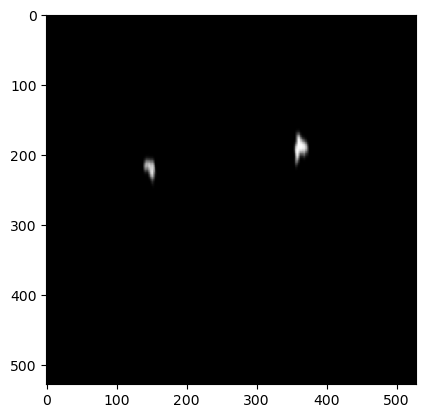

<class 'numpy.ndarray'> (519, 513)


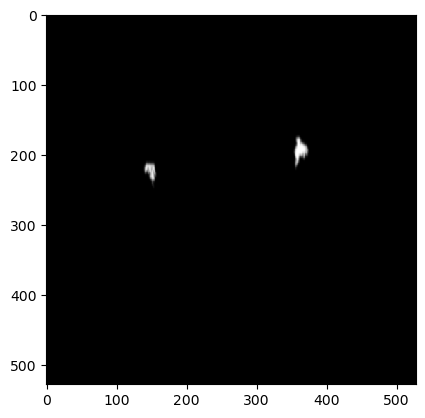

<class 'numpy.ndarray'> (511, 511)


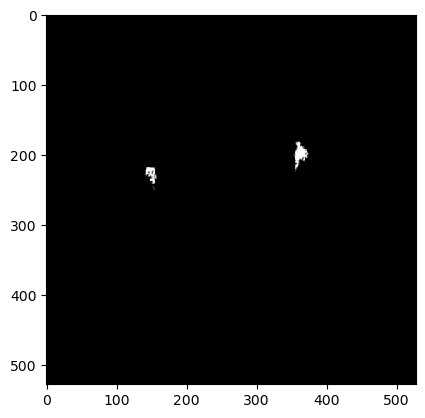

<class 'numpy.ndarray'> (504, 510)


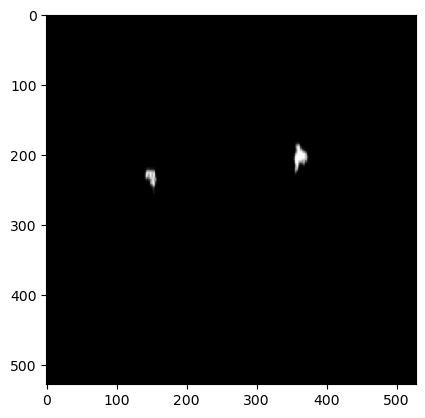

<class 'numpy.ndarray'> (498, 508)


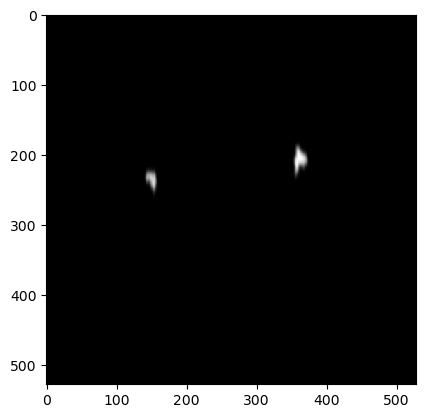

<class 'numpy.ndarray'> (495, 507)


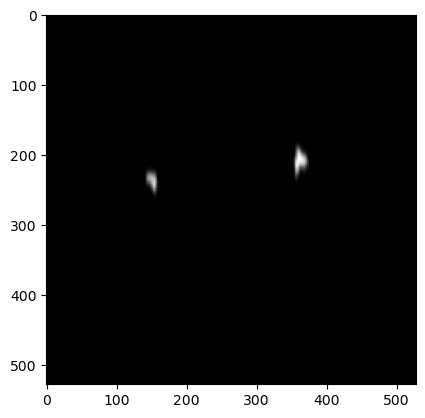

<class 'numpy.ndarray'> (495, 507)


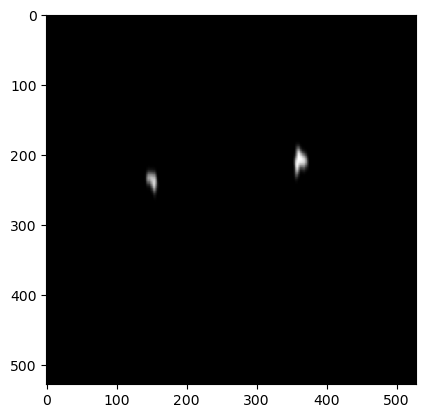

<class 'numpy.ndarray'> (499, 508)


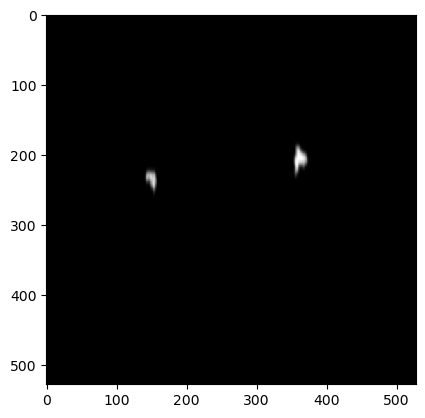

<class 'numpy.ndarray'> (506, 510)


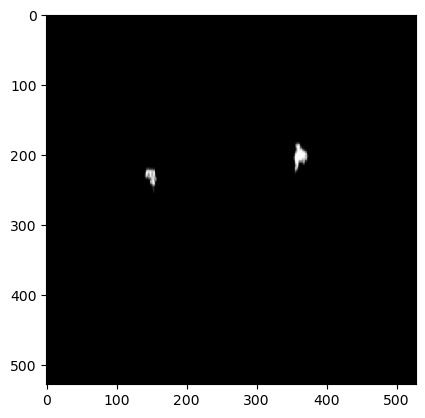

<class 'numpy.ndarray'> (513, 512)


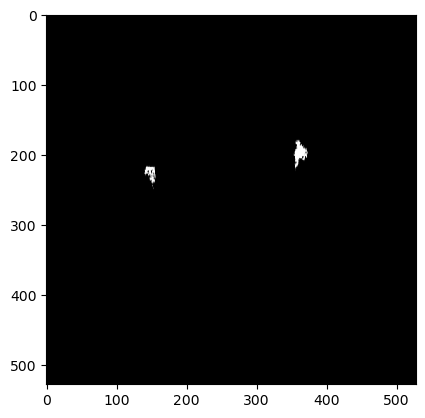

<class 'numpy.ndarray'> (521, 514)


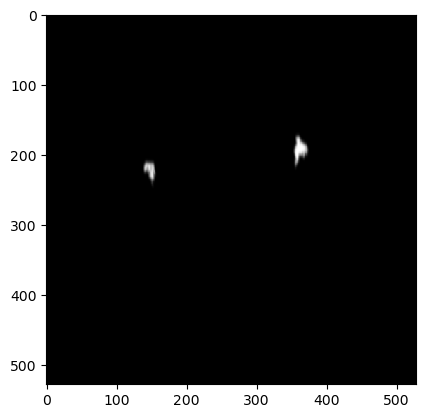

<class 'numpy.ndarray'> (526, 515)


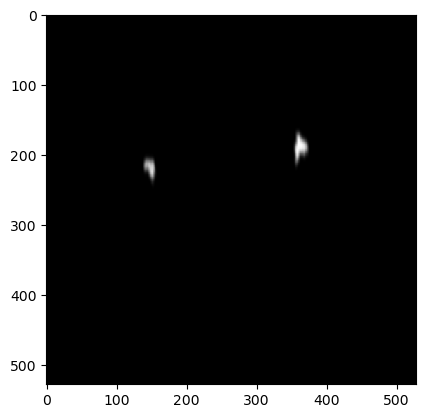

(5, 20, 64, 64, 1)


In [24]:
import skimage
import numpy as np
import imageio
import random
from PIL import Image
import skimage.transform
from skimage.transform import resize, rotate

def rotate_arr(arr, angle):
    return rotate(arr, angle, preserve_range=True, mode='edge')

def flip_array_lr(arr):
    return np.fliplr(arr)

def compress_array(arr, compression_factor_height,compression_factor_width):
    return resize(arr, (int(arr.shape[0] * compression_factor_height),
                                int(arr.shape[1] * compression_factor_width)),
                                anti_aliasing=True, mode='reflect')

def plot_arr(arr, hide_axis=False):
    plt.imshow(arr, cmap='gray', interpolation='nearest')
    if hide_axis:
        plt.axis('off')
    plt.show()


def generate_frame(image_array, t, max_elongation, width_weight, blur_size):

    elongation_factor_height = 1.0 + max_elongation * t
    elongation_factor_width = 1.0 + max_elongation * width_weight * t
    output_image = resize(image_array, (int(image_array.shape[0] * elongation_factor_height),
                                        int(image_array.shape[1] * elongation_factor_width)),
                                        anti_aliasing=True, preserve_range=True) 
    #,mode='reflect')
    
    sigma = blur_size * np.abs(t)
    output = gaussian_filter(output_image, sigma=(sigma, sigma*width_weight))
    # print(output.shape)
    # plot_arr(output)
    return output


def random_resize_image(base_image, rand_min = 0.5, rand_max=1.5):
    """ Resize the image randomly within 0.5 to 1.5 times the original dimensions. """
    rand_height = int(base_image.shape[0] * np.random.uniform(rand_min, rand_max))
    rand_width = int(base_image.shape[1] * np.random.uniform(rand_min, rand_max))
    resized_image = resize(base_image, (rand_height, rand_width), 
                           anti_aliasing=True, preserve_range=True)
    # print(f"Resized image dimensions: {resized_image.shape}")
    return resized_image
    

def place_image_on_black_frame(base_image, resized_image, black_frame_size):
    """ Place the resized image on a black frame aligned at the bottom and centered horizontally. """
    resized_height = resized_image.shape[0] 
    resized_width = resized_image.shape[1]
    
    black_image = np.zeros(black_frame_size, dtype=base_image.dtype)
    vertical_start = black_frame_size[0] - resized_height
    horizontal_start = (black_frame_size[1] - resized_width) // 2
    black_image[vertical_start:vertical_start + resized_height, horizontal_start:horizontal_start + resized_width] = resized_image.astype(base_image.dtype)
    # plot_arr(black_image)
    return black_image
    

# Function to normalize a sequence of frames to a specific size
def normalize_sequence(frames, target_shape):
    normalized_frames = [resize(frame, (target_shape), anti_aliasing=True) for frame in frames]
    return normalized_frames

def average_third_dimension(array):
    # Calculate the average along the third dimension
    #averaged_array = np.mean(array, axis=2, keepdims=True)
    averaged_array = array
    return averaged_array


# Parameters and image setup
# height, width, channels = 100, 100, 3  # Dimensions of the image
# original_image = np.random.randint(0, 256, (height, width, channels), dtype=np.uint8)  # Random image

test_img_path = "/Users/christosmichalopoulos/Desktop/segm/biggest_slice/p_001_ROI.nii_slice_30_max_volume.png"
output_folder = "/Users/christosmichalopoulos/Desktop/segm/frames"

original_image = np.array(Image.open(test_img_path))

def save_frames(frames, folder_path, sequence_index):
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
    for idx, frame in enumerate(frames):
        file_path = os.path.join(folder_path, f'seq{sequence_index}_frame{idx}.png')
        # Remove the single color channel dimension if present
        if frame.shape[-1] == 1:
            frame = np.squeeze(frame, axis=-1)
        # Normalize to [0, 255] and convert to uint8
        frame = (255 * (frame - np.min(frame)) / (np.max(frame) - np.min(frame))).astype(np.uint8)
        imageio.imwrite(file_path, frame)

n = 5  # Number of sequences
m = 20  # Number of frames per sequence

# Process and store sequences
sequences = []
for i in range(n):
    main_sequence_image = original_image
    # Create frames for each sequence
    frames = []
    # generating randomness
    time_wave_start = 2 * (np.random.rand() - 0.5)
    time_wave_end = (2 + time_wave_start) + 2*(np.random.rand() - 0.5)
    time_wave = np.sin(np.linspace(time_wave_start*np.pi, time_wave_end * np.pi, m))
    max_elongation = np.random.rand() * 0.3
    width_weight = np.random.rand() * 0.3
    blur_amout = np.random.rand() * 10
    flip_or_not = np.round(np.random.rand())
    rot_angle = np.random.rand() * 5
    
    for j in range(m):
        
        edited_array = generate_frame(main_sequence_image, time_wave[j], max_elongation, width_weight, blur_amout)
        
        black_frame_size = (int(main_sequence_image.shape[0] * (1+max_elongation)),
                            int(main_sequence_image.shape[1] * (1+max_elongation)))
        
        frame = place_image_on_black_frame(main_sequence_image, edited_array, black_frame_size)
        frame = average_third_dimension(frame)
        if flip_or_not == 1:
            frame = flip_array_lr(frame)
        frame = rotate_arr(frame, rot_angle)
        frames.append(frame)
        if i==0:
            
            print(type(edited_array), edited_array.shape)
            # plot_arr(edited_array)
            # print(type(frame), frame.shape)
            plot_arr(frame)
            pass
        
    target_shape = (64, 64, 1)
    reshaped_frames = normalize_sequence(frames, target_shape)
    # `sequences` now contains all the processed and normalized frames.
    sequences.append(reshaped_frames)
    save_frames(reshaped_frames, output_folder, i)



print(np.array(sequences).shape)


